# LaTeX Parser Runner

This notebook provides a clean interface for parsing LaTeX papers and extracting bibliography items and references.

## Overview

The notebook uses utility functions from `src/parse_util.py` to:
- Parse LaTeX papers and extract bibliography items (`bibitems.jsonl`)
- Extract references from papers (`references.jsonl`)
- Generate statistics and quality checks
- Support both single paper and batch processing modes

## Features

- **Single Paper Mode**: Process a specific paper by ID
- **Batch Mode**: Process multiple papers with filtering options
- **Statistics**: Automatic computation of parsing statistics
- **Quality Checks**: Quick validation of output files

## Configuration

Configure the parsing pipeline by setting the following parameters:

- **`RUN_ALL`**: `True` for batch processing, `False` for single paper
- **`PAPER_ID`**: Paper ID to process (used when `RUN_ALL=False`)
- **`START`**: Starting paper ID for filtering (used when `RUN_ALL=True`)
- **`NUM`**: Maximum number of papers to process (used when `RUN_ALL=True`)

**Note**: Existing output files will be overwritten.



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Setup paths and import utilities
import sys
from pathlib import Path

# Add src to path for imports
ROOT = Path("/content/drive/MyDrive/23120334").resolve()
sys.path.append(str(ROOT / "src"))

from parse_util import (
    setup_paths,
    cleanup_output_files,
    get_paper_list,
    run_parser,
    compute_statistics,
    print_statistics,
    quick_check,
    print_quick_check,
    build_refs_bib,
    generate_hierarchy_json,
    postprocess_token_fields,
)

# ============================================================================
# Configuration
# ============================================================================

# Processing mode
RUN_ALL = True           # True: batch processing; False: single paper
PAPER_ID = "2408-02468"  # Used when RUN_ALL=False
START = "2408-02468"     # Starting paper ID filter (used when RUN_ALL=True)
NUM = 5000               # Maximum papers to process (used when RUN_ALL=True)

# Setup paths
paths = setup_paths(root=ROOT)
PAPER_ROOT = paths['paper_root']
BIB_PATH = paths['bib_path']
REF_PATH = paths['ref_path']

# Cleanup existing output files
cleanup_output_files(BIB_PATH, REF_PATH)

# Display configuration
print("=" * 60)
print("CONFIGURATION")
print("=" * 60)

def display_path(path_value: Path) -> str:
    try:
        relative = Path(path_value).resolve().relative_to(paths['root'])
        return str(Path(paths['root'].name) / relative)
    except ValueError:
        return str(path_value)

print(f"Root directory:        {paths['root'].name}")
print(f"Paper root:            {display_path(PAPER_ROOT)}")
print(f"Output directory:      {display_path(paths['agg_dir'])}")
print(f"Bibitems output:       {display_path(BIB_PATH)}")
print(f"References output:     {display_path(REF_PATH)}")
print(f"Processing mode:        {'Batch' if RUN_ALL else 'Single Paper'}")
if RUN_ALL:
    print(f"Start filter:           {START}")
    print(f"Max papers:             {NUM}")
else:
    print(f"Paper ID:               {PAPER_ID}")
print("=" * 60)

CONFIGURATION
Root directory:        23120334
Paper root:            23120334/23120334
Output directory:      23120334/aggregated
Bibitems output:       23120334/aggregated/bibitems.jsonl
References output:     23120334/aggregated/references.jsonl
Processing mode:        Batch
Start filter:           2408-02468
Max papers:             5000


/content/drive/MyDrive/23120334/src/parse_util.py:169: SyntaxWarning: invalid escape sequence '\c'
  """Unwrap simple LaTeX commands like \cmd{...} or \cmd[opt]{...} -> ..."""
/content/drive/MyDrive/23120334/src/parse_util.py:187: SyntaxWarning: invalid escape sequence '\['
  3. Remove spacing commands (\[.3cm], etc.)


## Run Parser

Execute the parsing pipeline for the configured papers. The parser will:
- Extract bibliography items from LaTeX files
- Extract references from papers
- Write results to aggregated JSONL files
- Display progress and summary statistics



In [ ]:
# Get list of papers to process
papers = get_paper_list(
    paper_root=PAPER_ROOT,
    run_all=RUN_ALL,
    paper_id=PAPER_ID if not RUN_ALL else None,
    start=START if RUN_ALL else None,
    num=NUM if RUN_ALL else None,
)

print(f"\nFound {len(papers)} papers to process\n")

# Run parser (always generates refs.bib and hierarchy.json)
print(
    f"Writing aggregated outputs: {display_path(BIB_PATH)} and {display_path(REF_PATH)}"
)
processed, skipped = run_parser(
    papers=papers,
    bib_path=BIB_PATH,
    ref_path=REF_PATH,
    show_progress=False
)

# Post-process tokens (remove stopwords and author tokens from title_tokens)
print("Post-processing token fields...")
postprocess_token_fields(BIB_PATH)
postprocess_token_fields(REF_PATH)
print("Post-processing complete.")

# Display summary
print("\n" + "=" * 60)
print("PARSING SUMMARY")
print("=" * 60)
print(f"Total papers found:     {len(papers)}")
print(f"Successfully processed:  {processed}")
print(f"Skipped:                 {len(skipped)}")
if skipped:
    print(f"\nSkipped examples (first 5):")
    for paper_id, reason in skipped[:5]:
        print(f"  - {paper_id}: {reason}")
print(f"\nOutput files:")
print(f"  - {display_path(BIB_PATH)}")
print(f"  - {display_path(REF_PATH)}")
print("=" * 60)


Found 5000 papers to process

Writing aggregated outputs: 23120334\aggregated\bibitems.jsonl and 23120334\aggregated\references.jsonl
[   1/5000] 2408-02468   | parsing
[   2/5000] 2408-02469   | parsing
[   3/5000] 2408-02470   | parsing
[   4/5000] 2408-02471   | parsing
[   5/5000] 2408-02472   | parsing
[   6/5000] 2408-02473   | parsing
[   7/5000] 2408-02474   | parsing
[   8/5000] 2408-02475   | parsing
[   9/5000] 2408-02476   | parsing
[  10/5000] 2408-02477   | parsing
[  11/5000] 2408-02478   | parsing
[  12/5000] 2408-02479   | parsing
[  13/5000] 2408-02480   | parsing
[  14/5000] 2408-02481   | parsing
[  15/5000] 2408-02482   | parsing
[  16/5000] 2408-02483   | parsing
[  17/5000] 2408-02484   | parsing
[  18/5000] 2408-02485   | parsing
[  19/5000] 2408-02486   | parsing
[  20/5000] 2408-02487   | parsing
[  21/5000] 2408-02488   | parsing
[  22/5000] 2408-02489   | parsing
[  23/5000] 2408-02490   | parsing
[  24/5000] 2408-02491   | parsing
[  25/5000] 2408-02492   

## Statistics

Compute and display comprehensive statistics from the parsed data:
- Total papers, bibitems, and references
- Papers with missing data
- Top papers by bibitems and references counts



In [ ]:
# Compute and display statistics
stats = compute_statistics(BIB_PATH, REF_PATH)
print_statistics(stats, top_n=5)



PARSING STATISTICS
Total papers seen:        4717
Total bibitems:           5,291,635
Total references:         92,808
Papers with no bibitems:  1112
Papers with no references: 487

Example papers missing bibitems: ['2408-02477', '2408-02484', '2408-02486', '2408-02493', '2408-02506']
Example papers missing references: ['2408-02468', '2408-02472', '2408-02474', '2408-02490', '2408-02532']

Top 5 papers by bibitems count:
  2408-06778: 388,638
  2408-03618: 313,637
  2408-05497: 283,957
  2408-04167: 192,727
  2408-06941: 189,332

Top 5 papers by references count:
  2408-05240: 510
  2408-02583: 309
  2408-04909: 262
  2408-06687: 196
  2408-04879: 179


## Visualization

Generate comprehensive visualizations to better understand the parsing results:
- Processing summary (success vs skipped)
- Missing data distribution (papers with/without bibitems/references)
- Distribution comparisons (bibitems vs references)
- Top papers by bibitems and references counts


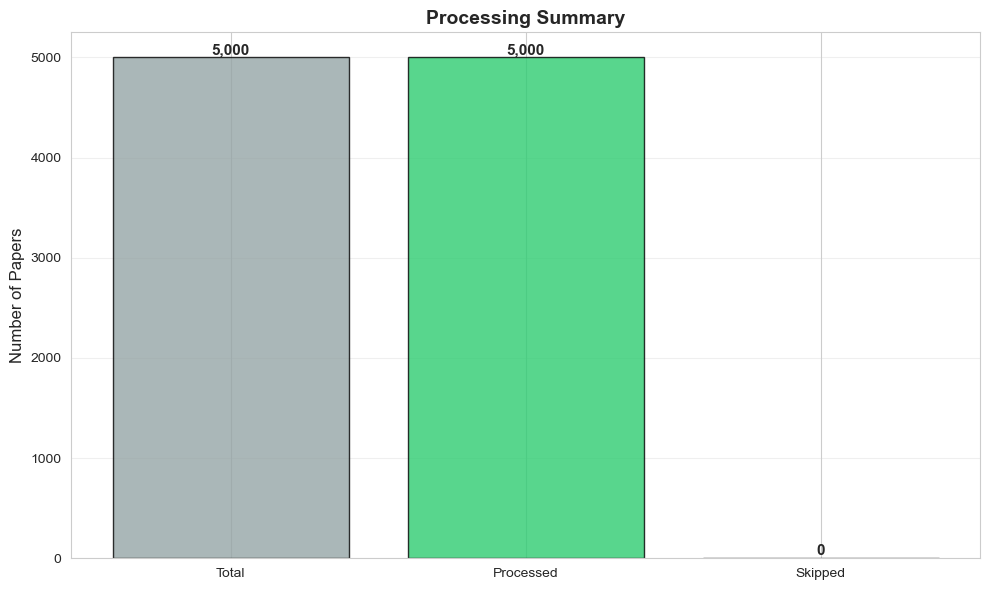

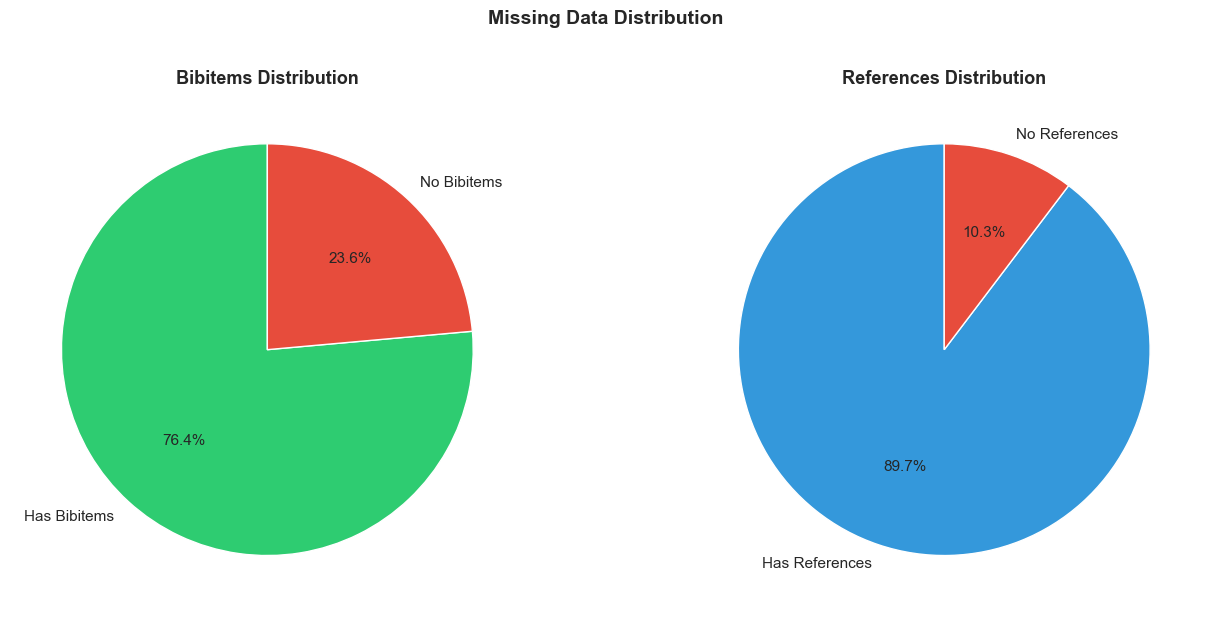

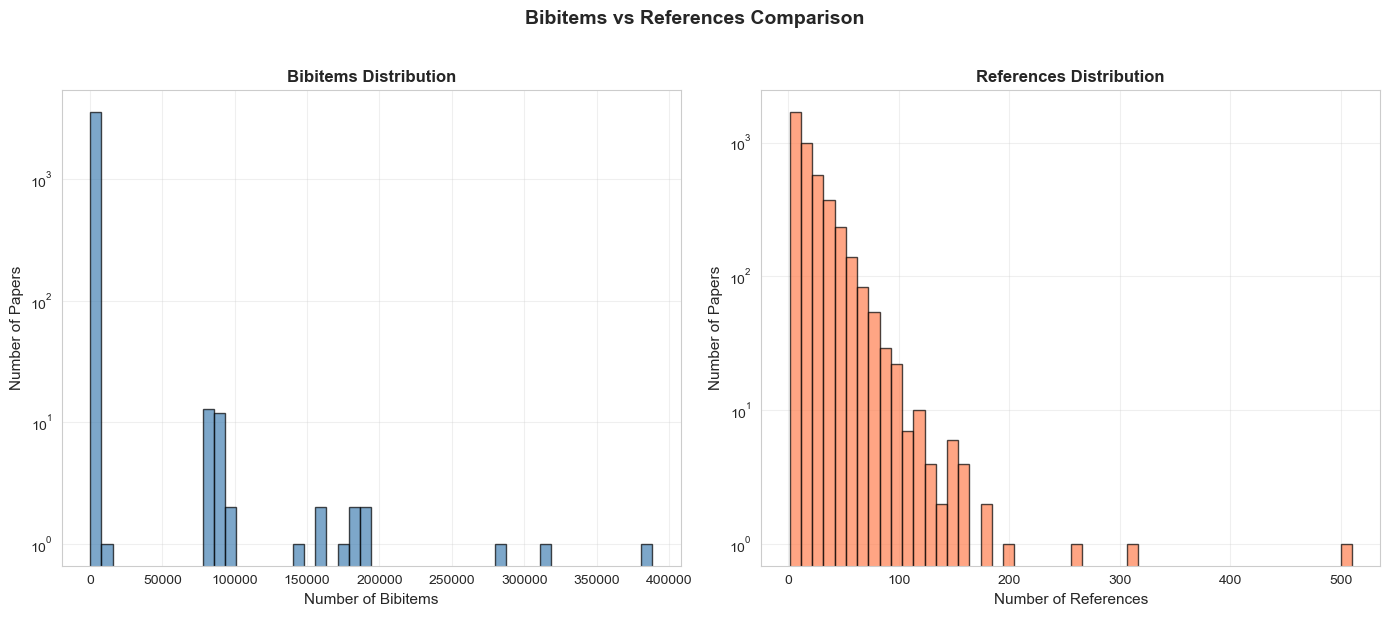

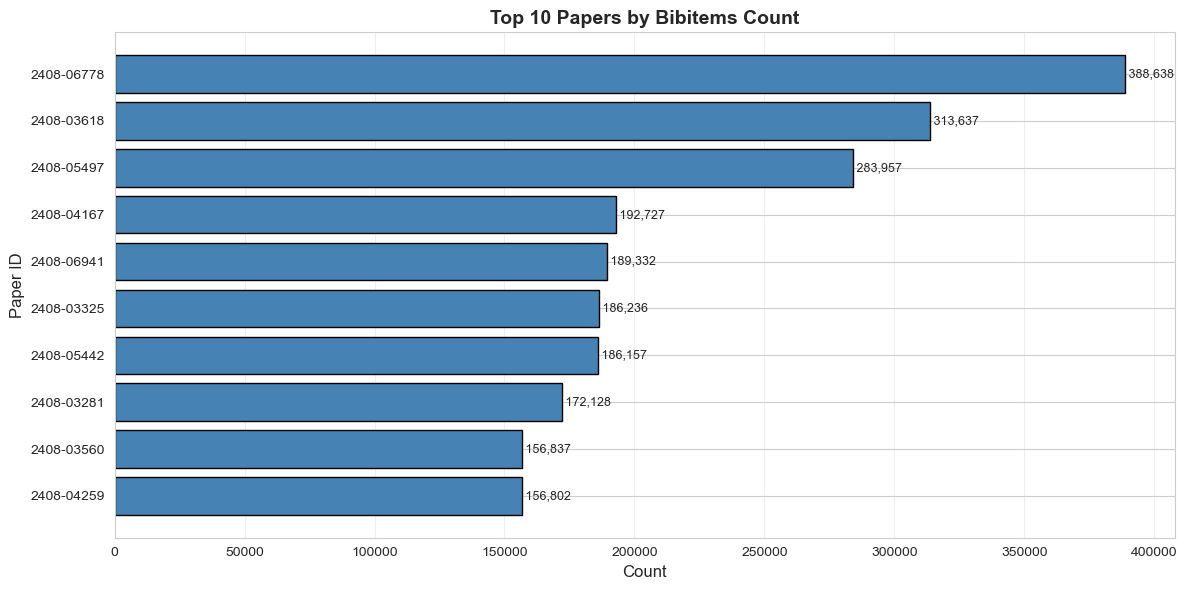

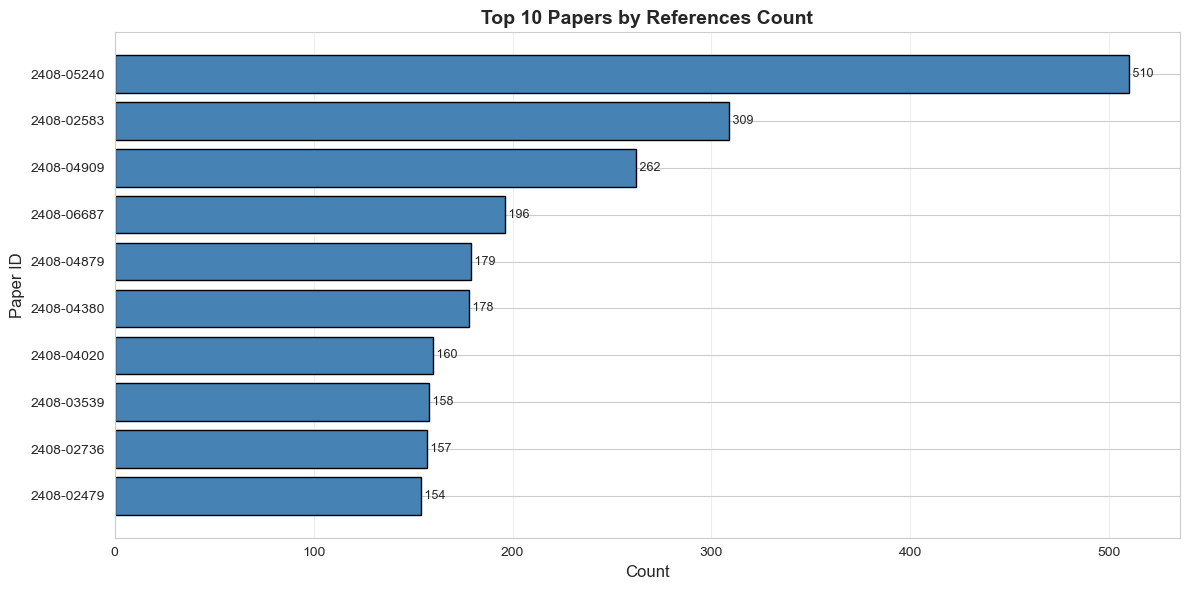

In [ ]:
# Import visualization functions
from visualization import visualize_parsing_statistics

# Create comprehensive visualization dashboard
# Note: stats variable should be available from previous cell
if 'stats' in globals() and 'processed' in globals() and 'skipped' in globals():
    processing_summary = {
        'total': len(papers) if 'papers' in globals() else 0,
        'processed': processed,
        'skipped': len(skipped) if 'skipped' in globals() else 0
    }
    visualize_parsing_statistics(
        stats=stats,
        processing_summary=processing_summary,
        top_n=10
    )
else:
    print("Warning: Statistics not computed yet. Please run the Statistics cell first.")


## Quick Check

Perform a quick validation of the output files:
- Count lines in output files
- Display sample entries to verify content format



In [ ]:
# Quick check of output files
check_result = quick_check(BIB_PATH, REF_PATH, num_samples=3)
print_quick_check(check_result)



QUICK CHECK
bibitems.jsonl lines:     5,291,635
references.jsonl lines:   92,808

Sample bibitems:
  [1] {"paper_id": "2408-02468", "key": "Adaptation_of_current_control_to_voc", "note": "M.~Lu, G.-S. Seo,...
  [2] {"paper_id": "2408-02468", "key": "Comparison_droop_vsm_voc_isolated_microgrid", "note": "\\BIBentry...
  [3] {"paper_id": "2408-02468", "key": "Comparison_of_DZ_VDP_Microgrid", "note": "V.~Gurugubelli, A.~Ghos...

Sample references:
  [1] {"paper_id": "2408-02471", "id": "2407-10530", "title": "Constructive Krein-Rutman result for Kineti...
  [2] {"paper_id": "2408-02471", "id": "2406-10112", "title": "The Kinetic Fokker–Planck equation in a dom...
  [3] {"paper_id": "2408-02471", "id": "2305-06652", "title": "On the Krein-Rutman theorem and beyond", "a...


## RUN THIS CELL WHEN YOU WANT TO CLEAR TEX SOURCE!

In [ ]:
# # Cleanup: keep only required files per paper folder
# from pathlib import Path
# import shutil

# KEEP_FILES = {
#     "metadata.json",
#     "references.json",
#     "refs.bib",
#     "hierarchy.json",
#     "pred.json",
# }
# DRY_RUN = False  # Set True to preview deletions

# if not PAPER_ROOT.exists():
#     print(f"Paper root not found: {PAPER_ROOT}")
# else:
#     deleted_files = 0
#     deleted_dirs = 0
#     for paper_dir in PAPER_ROOT.iterdir():
#         if not paper_dir.is_dir():
#             continue
#         for item in paper_dir.iterdir():
#             if item.is_dir():
#                 if DRY_RUN:
#                     print(f"[DIR] delete: {item}")
#                 else:
#                     shutil.rmtree(item, ignore_errors=True)
#                 deleted_dirs += 1
#             elif item.is_file():
#                 if item.name in KEEP_FILES:
#                     continue
#                 if DRY_RUN:
#                     print(f"[FILE] delete: {item}")
#                 else:
#                     try:
#                         item.unlink()
#                     except FileNotFoundError:
#                         pass
#                 deleted_files += 1

#     print(f"Cleanup complete. Deleted {deleted_files} files and {deleted_dirs} folders.")

